In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## Data Preprocessing

### Data Sources

- Population Data: [UN Data Bank](https://population.un.org/wpp/Download/Standard/MostUsed)
- GDP Data: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=PK)
- Inflation Data: [World Bank](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=PK)
- Unemployment Data: [World Bank](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=PK)
- Homicides Data: [World Bank](https://data.worldbank.org/indicator/VC.IHR.PSRC.P5?locations=PK)

### Data Description:
- The data contains the population, inflation, homicides, gdp, unemployment of all countries from 1950 to 2020.
- The data is in excel format.
 
We will extract all data, clean it, and merge it into a single dataframe.

### Data Cleaning

- We will remove all the columns that are not required.
- We will replace null values with Minimum value of the column, since most nulls are at the start of the data, and we can't replace them with mean or median.
- We will merge all the data into a single dataframe.
- We will remove all the rows with null values.

In [13]:
population_df = pd.read_excel('Data/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx')
gdp_df = pd.read_excel('Data/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_339292.xls')
inflation_df = pd.read_excel('Data/API_FP.CPI.TOTL.ZG_DS2_en_excel_v2_340510.xls')
homicides_df = pd.read_excel('Data/API_VC.IHR.PSRC.P5_DS2_en_excel_v2_330978.xls')
unemployment_df = pd.read_excel('Data/API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_337831.xls')


population_df = population_df[population_df.iloc[:,2] == 'Pakistan']
population_df = population_df.iloc[:,[10, 12, 13, 14, 16, 17, 21, 36 ]]
population_df.columns = ['Year', 'Total', 'Male', 'Female', 'Ratio', 'Median Age', 'Increase Rate', 'Life Expectancy']


gdp_df = gdp_df.iloc[[2, gdp_df[gdp_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
gdp_df = gdp_df.iloc[:, 1:]
gdp_df.columns = ['Year', 'GDP']
gdp_df = gdp_df.iloc[4:-1]


inflation_df = inflation_df.iloc[[2, inflation_df[inflation_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
inflation_df = inflation_df.iloc[:, 1:]
inflation_df.columns = ['Year', 'Inflation']
inflation_df = inflation_df.iloc[4:-1]


homicides_df = homicides_df.iloc[[2, homicides_df[homicides_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
homicides_df = homicides_df.iloc[:, 1:]
homicides_df.columns = ['Year', 'Homicides']
homicides_df = homicides_df.iloc[4:-1]
    
    
unemployment_df = unemployment_df.iloc[[2, unemployment_df[unemployment_df.iloc[:, 0] == 'Pakistan'].index[0]]].T.reset_index()
unemployment_df = unemployment_df.iloc[:, 1:]
unemployment_df.columns = ['Year', 'Unemployment']
unemployment_df = unemployment_df.iloc[4:-1]


#### Data Transformation

In [14]:
merged_df = population_df.merge(inflation_df, on='Year', how='left')
merged_df = merged_df.merge(unemployment_df, on='Year', how='left')
merged_df = merged_df.merge(gdp_df, on='Year', how='left')
merged_df = merged_df.merge(homicides_df, on='Year', how='left')

merged_df['Homicides'] = merged_df['Homicides'].replace(np.nan, merged_df['Homicides'].min())
merged_df['Inflation'] = merged_df['Inflation'].replace(np.nan, merged_df['Inflation'].min())
merged_df['Unemployment'] = merged_df['Unemployment'].replace(np.nan, merged_df['Unemployment'].min())
merged_df['GDP'] = merged_df['GDP'].replace(np.nan, merged_df['GDP'].min())


merged_df = merged_df.iloc[10:]
merged_df.to_excel('Refined/CleanData.xlsx', index=False)

/var/folders/cr/xq3hv2dd6_35ryf4zc615mx80000gn/T/ipykernel_54380/3359571910.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['Homicides'] = merged_df['Homicides'].replace(np.nan, merged_df['Homicides'].min())
/var/folders/cr/xq3hv2dd6_35ryf4zc615mx80000gn/T/ipykernel_54380/3359571910.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['Inflation'] = merged_df['Inflation'].replace(np.nan, merged_df['Inflation'].min())
/var/folders/cr/xq3hv2dd6_35ryf4zc615mx80000gn/T/ipykernel_54380/3359571910.py:8: FutureWarn

### Data Visualization

- We will visualize the data to see the trends of the data.
- We will visualize the data to see the correlation between different columns.
- We will visualize the data to see the distribution of the data.

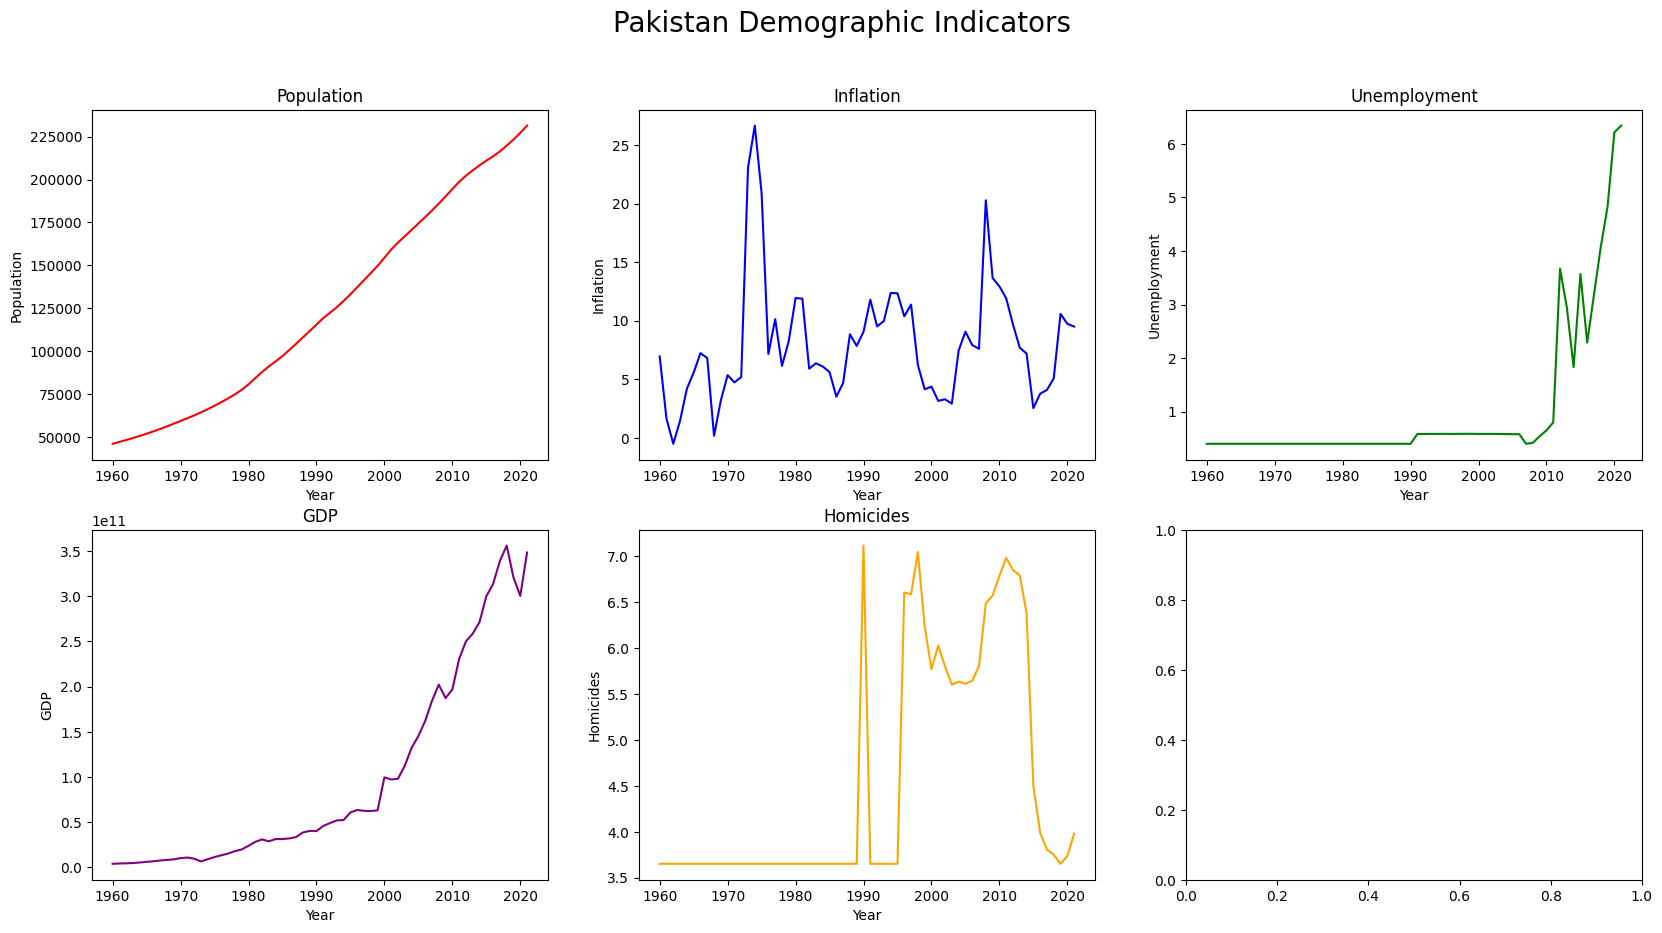

In [15]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Pakistan Demographic Indicators', fontsize=20)

ax[0, 0].plot(merged_df['Year'], merged_df['Total'], color='red')
ax[0, 0].set_title('Population')
ax[0, 0].set_ylabel('Population')
ax[0, 0].set_xlabel('Year')

ax[0, 1].plot(merged_df['Year'], merged_df['Inflation'], color='blue')
ax[0, 1].set_title('Inflation')
ax[0, 1].set_ylabel('Inflation')
ax[0, 1].set_xlabel('Year')

ax[0, 2].plot(merged_df['Year'], merged_df['Unemployment'], color='green')
ax[0, 2].set_title('Unemployment')
ax[0, 2].set_ylabel('Unemployment')
ax[0, 2].set_xlabel('Year')

ax[1, 0].plot(merged_df['Year'], merged_df['GDP'], color='purple')
ax[1, 0].set_title('GDP')
ax[1, 0].set_ylabel('GDP')
ax[1, 0].set_xlabel('Year')

ax[1, 1].plot(merged_df['Year'], merged_df['Homicides'], color='orange')
ax[1, 1].set_title('Homicides')
ax[1, 1].set_ylabel('Homicides')
ax[1, 1].set_xlabel('Year')

plt.show()


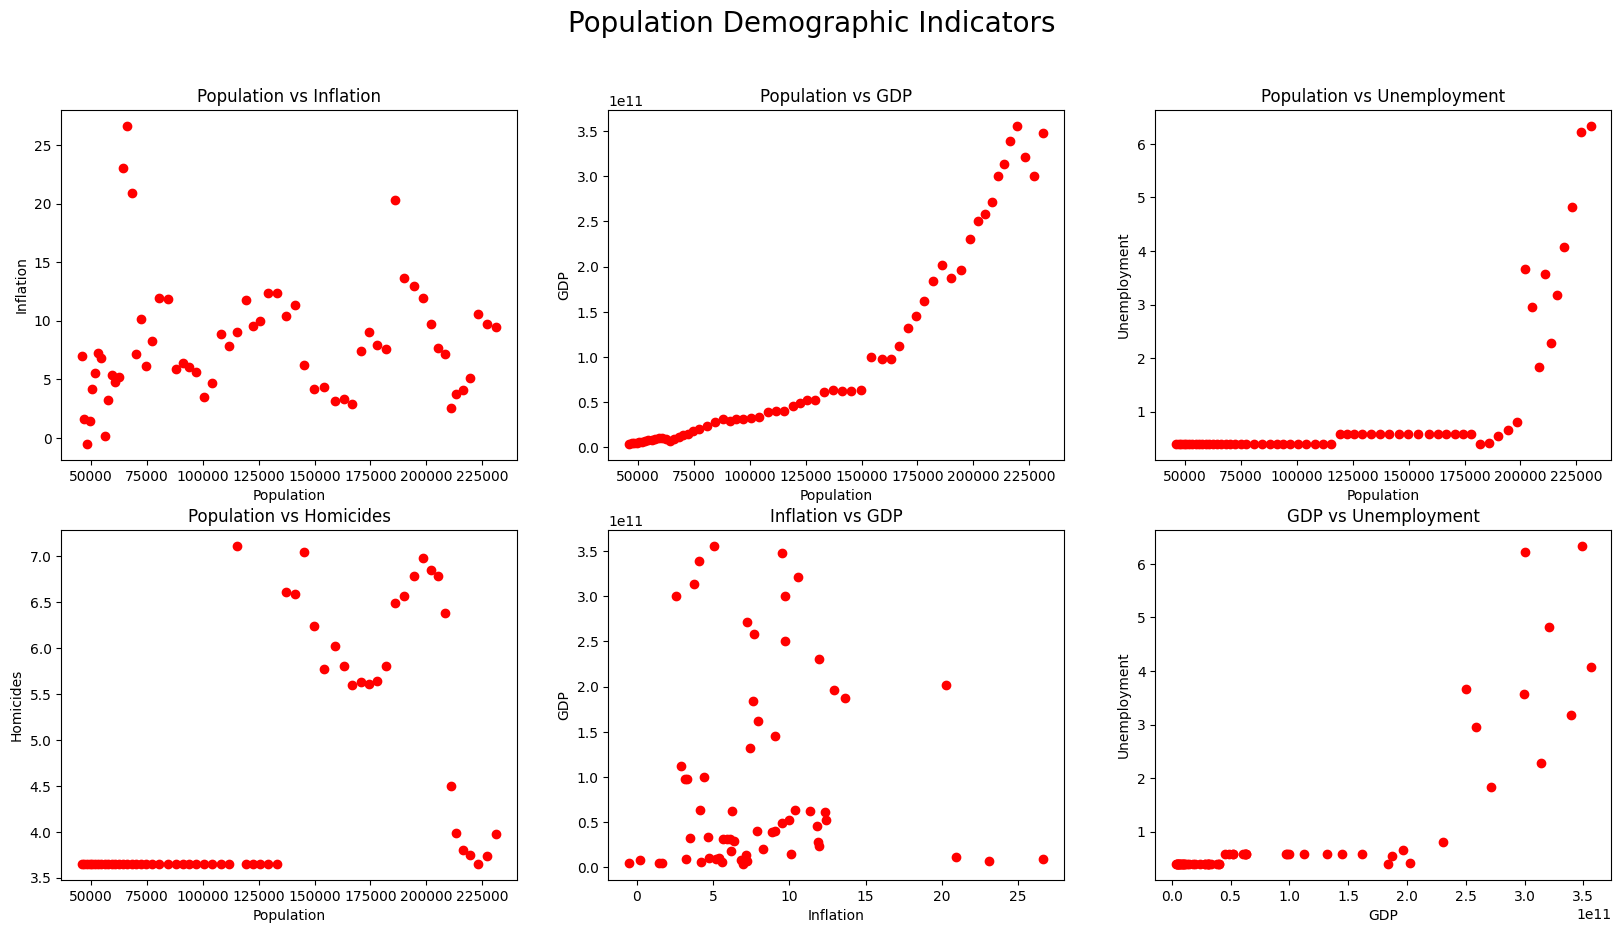

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Population Demographic Indicators', fontsize=20)

ax[0, 0].scatter(merged_df['Total'], merged_df['Inflation'], color='red')
ax[0, 0].set_title('Population vs Inflation')
ax[0, 0].set_ylabel('Inflation')
ax[0, 0].set_xlabel('Population')

ax[0, 1].scatter(merged_df['Total'], merged_df['GDP'], color='red')
ax[0, 1].set_title('Population vs GDP')
ax[0, 1].set_ylabel('GDP')
ax[0, 1].set_xlabel('Population')

ax[0, 2].scatter(merged_df['Total'], merged_df['Unemployment'], color='red')
ax[0, 2].set_title('Population vs Unemployment')
ax[0, 2].set_ylabel('Unemployment')
ax[0, 2].set_xlabel('Population')

ax[1, 0].scatter(merged_df['Total'], merged_df['Homicides'], color='red')
ax[1, 0].set_title('Population vs Homicides')
ax[1, 0].set_ylabel('Homicides')
ax[1, 0].set_xlabel('Population')

ax[1, 1].scatter(merged_df['Inflation'], merged_df['GDP'], color='red')
ax[1, 1].set_title('Inflation vs GDP')
ax[1, 1].set_ylabel('GDP')
ax[1, 1].set_xlabel('Inflation')

ax[1, 2].scatter(merged_df['GDP'], merged_df['Unemployment'], color='red')
ax[1, 2].set_title('GDP vs Unemployment')
ax[1, 2].set_ylabel('Unemployment')
ax[1, 2].set_xlabel('GDP')


plt.show()
plt.show()

In [17]:
df = pd.read_excel('Refined/CleanData.xlsx')

scaler = MinMaxScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

df.head()


,Year,Total,Male,Female,Ratio,Median Age,Increase Rate,Life Expectancy,Inflation,Unemployment,GDP,Homicides
0,1960,0.000000,0.000000,0.000000,1.000000,0.499280,0.400303,0.000000,0.274613,0.0,0.000000,0.0
1,1961,0.005968,0.006178,0.005760,0.981232,0.479401,0.337178,0.032050,0.079357,0.0,0.001048,0.0
2,1962,0.011904,0.012334,0.011481,0.963974,0.453760,0.358422,0.064255,0.000000,0.0,0.001592,0.0
3,1963,0.018177,0.018815,0.017548,0.945338,0.428407,0.382094,0.115108,0.072590,0.0,0.002502,0.0
4,1964,0.024796,0.025630,0.023974,0.925323,0.399885,0.401821,0.155588,0.172779,0.0,0.004131,0.0


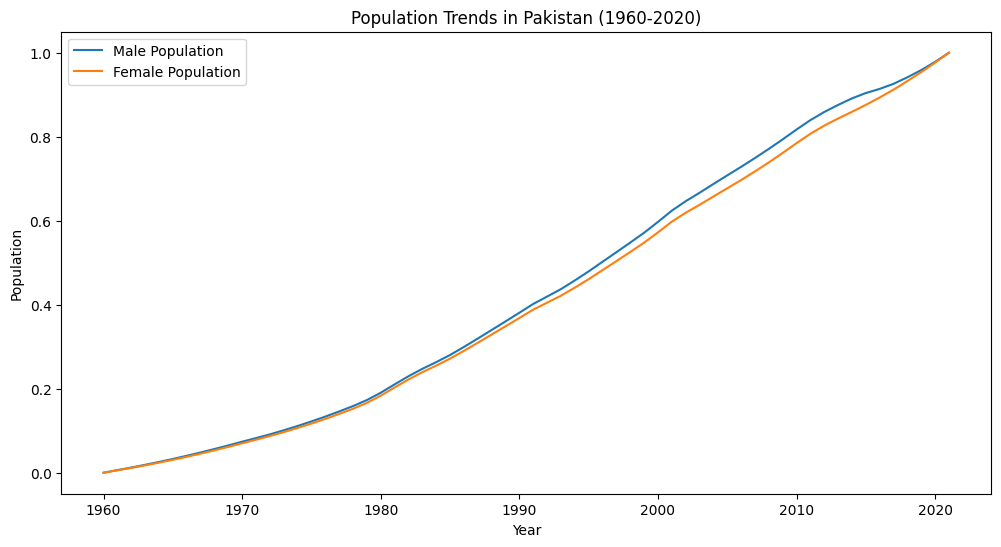

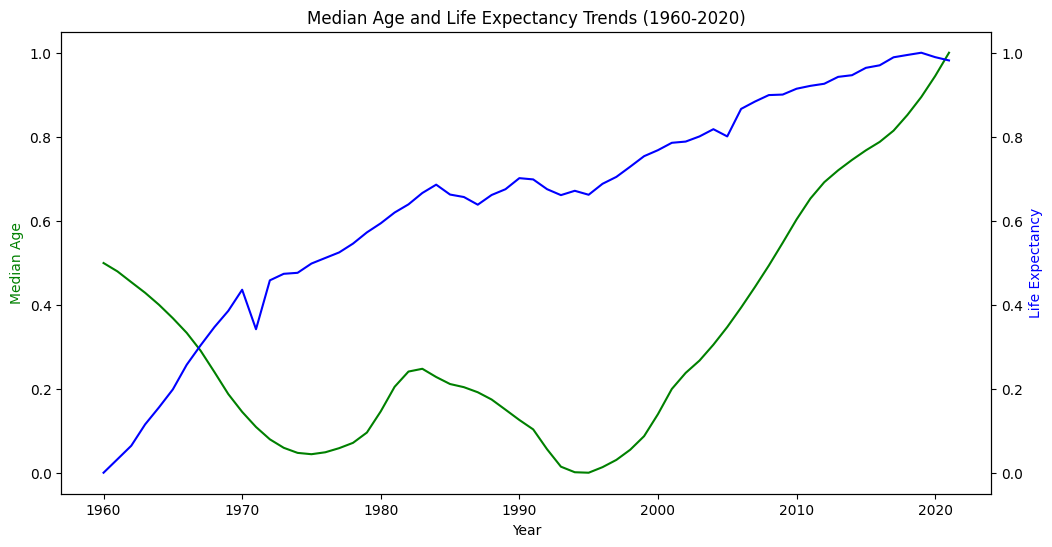

In [18]:
# Plotting population trends
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Male'], label='Male Population')
plt.plot(df['Year'], df['Female'], label='Female Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends in Pakistan (1960-2020)')
plt.legend()
plt.show()

# Analyzing median age and life expectancy trends
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(df['Year'], df['Median Age'], 'g-')
ax2.plot(df['Year'], df['Life Expectancy'], 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Median Age', color='g')
ax2.set_ylabel('Life Expectancy', color='b')

plt.title('Median Age and Life Expectancy Trends (1960-2020)')
plt.show()


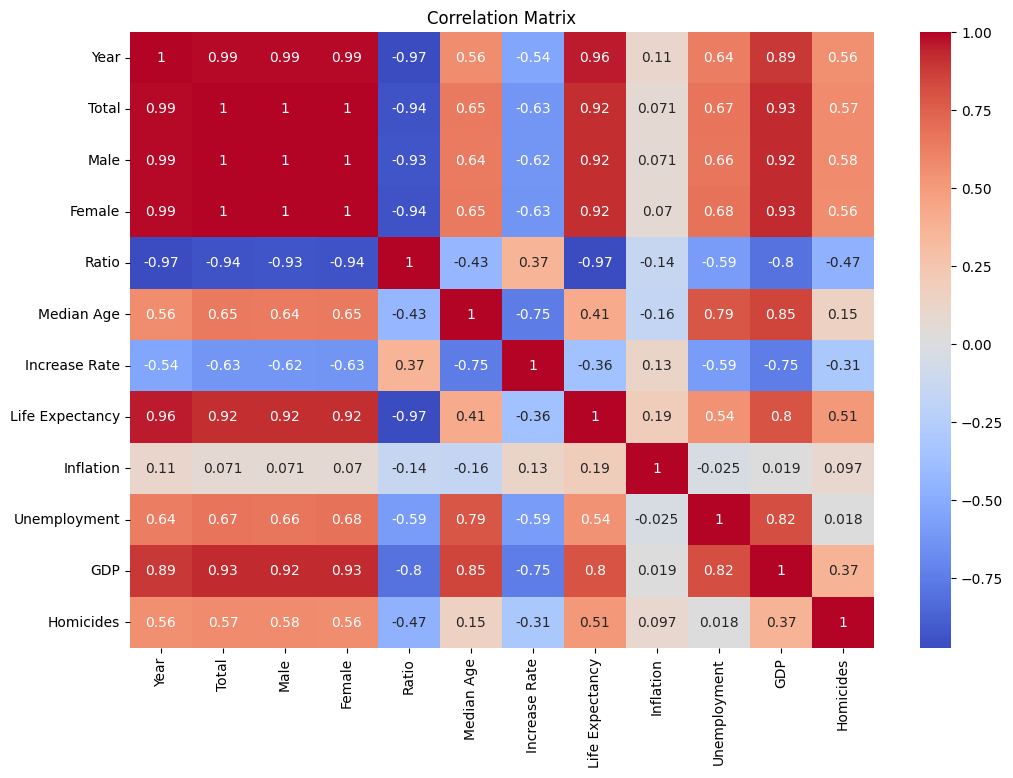

In [19]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix provides a visual representation of the relationships between different variables in your dataset. Here's a detailed interpretation of the insights derived from the correlation matrix:

### Strong Positive Correlations (r > 0.7)

1. **Year vs. Life Expectancy (0.96)**:
   - Life expectancy has significantly increased over the years.

2. **Total Population vs. Year (0.99)**:
   - The population has steadily increased over the years.

3. **Total Population vs. GDP (0.93)**:
   - GDP has a strong positive correlation with total population, indicating that GDP tends to increase as the population grows.

4. **Life Expectancy vs. GDP (0.80)**:
   - Countries with higher life expectancy tend to have higher GDP.

### Strong Negative Correlations (r < -0.7)

1. **Year vs. Ratio (-0.97)**:
   - The ratio (likely referring to sex ratio or another demographic ratio) has decreased over time.

2. **Total Population vs. Ratio (-0.94)**:
   - As the population increases, the ratio decreases, which may indicate a demographic shift.

### Moderate Correlations (0.3 < r < 0.7)

1. **Median Age vs. GDP (0.85)**:
   - Countries with a higher median age tend to have a higher GDP.

2. **Increase Rate vs. Median Age (-0.75)**:
   - Countries with a higher median age tend to have a lower population increase rate.

3. **Unemployment vs. GDP (0.82)**:
   - There is a strong positive correlation between unemployment and GDP, which might seem counterintuitive and could warrant further investigation.

### Weak Correlations (r < 0.3)

1. **Inflation vs. Most Variables**:
   - Inflation has weak correlations with most other variables, indicating that it may be influenced by factors not included in this dataset.

2. **Homicides**:
   - Homicides have weak to moderate correlations with other variables, suggesting that they are influenced by a complex set of factors.

### Insights and Implications

1. **Economic Growth and Demographics**:
   - Strong correlations between GDP and demographic variables like total population, median age, and life expectancy suggest that economic growth is closely tied to demographic trends.

2. **Population Increase and Median Age**:
   - The negative correlation between increase rate and median age suggests that countries with older populations tend to have lower population growth rates.

3. **Demographic Shifts**:
   - The strong negative correlation between year and ratio suggests significant demographic shifts over time, which could have implications for social and economic policies.

4. **Complexity of Inflation**:
   - Inflation’s weak correlations with other variables indicate that it might be influenced by external factors like monetary policy, global economic conditions, and commodity prices.

### Recommendations for Further Analysis

1. **Modeling Economic Growth**:
   - Develop regression models to further explore the relationship between GDP and demographic variables. Investigate potential causality and the impact of policy changes.

2. **Demographic Transition**:
   - Study the demographic transition in detail, particularly focusing on the implications of changing sex ratios and aging populations.

3. **Inflation Analysis**:
   - Perform a deeper analysis on inflation to identify external factors influencing it. Consider using time series models to account for its dynamic nature.

4. **Social Factors**:
   - Examine the factors influencing homicides and unemployment in more detail, potentially incorporating additional socio-economic variables to get a clearer picture.

### Conclusion

The correlation matrix reveals important relationships and trends within the dataset. These insights can guide further statistical analyses and help in understanding the socio-economic dynamics of Pakistan from 1960 to 2020.